In [7]:
import torch 
import torch.nn as nn
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F
from functools import partial
from cplAE_MET.models.torch_helpers import astensor, tonumpy
from cplAE_MET.utils.dataset import  load_M_inh_dataset
import cplAE_MET.utils.utils as  utils
from cplAE_MET.models.augmentations import get_padded_im, get_soma_aligned_im

In [2]:
conv3d_1 = nn.Conv3d(1, 1, kernel_size=(7, 3, 1), padding=(3, 1, 0))
pool3d_1 = nn.MaxPool3d((4, 1, 1), return_indices=True)
conv3d_2 = nn.Conv3d(1, 1, kernel_size=(7, 3, 1), padding=(3, 1, 0))
pool3d_2 = nn.MaxPool3d((4, 1, 1), return_indices=True)

convT1_1 = nn.ConvTranspose3d(1, 1, kernel_size=(7, 3, 1), padding=(3, 1, 0))
unpool3d_1 = nn.MaxUnpool3d((4, 1, 1))
convT1_2 = nn.ConvTranspose3d(1, 1, kernel_size=(7, 3, 1), padding=(3, 1, 0))
unpool3d_2 = nn.MaxUnpool3d((4, 1, 1))
relu = nn.ReLU()
elu = nn.ELU()



In [17]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
astensor_ = partial(astensor, device=device)

D = load_M_inh_dataset("/Users/fahimehb/Documents/git-workspace/cplAE_MET/data/proc/M_im_data_3Nov2021.mat")
D['XM'] = np.expand_dims(D['XM'], axis=1)
D['X_sd'] = np.expand_dims(D['X_sd'], axis=1)

# soma depth is range (0,1) <-- check this
pad = 60
norm2pixel_factor = 100
padded_soma_coord = np.squeeze(D['X_sd'] * norm2pixel_factor + pad)
D['XM'] = get_padded_im(im=D['XM'], pad=pad)
D['XM'] = get_soma_aligned_im(im=D['XM'], soma_H=padded_soma_coord)
images = astensor_(D['XM'])

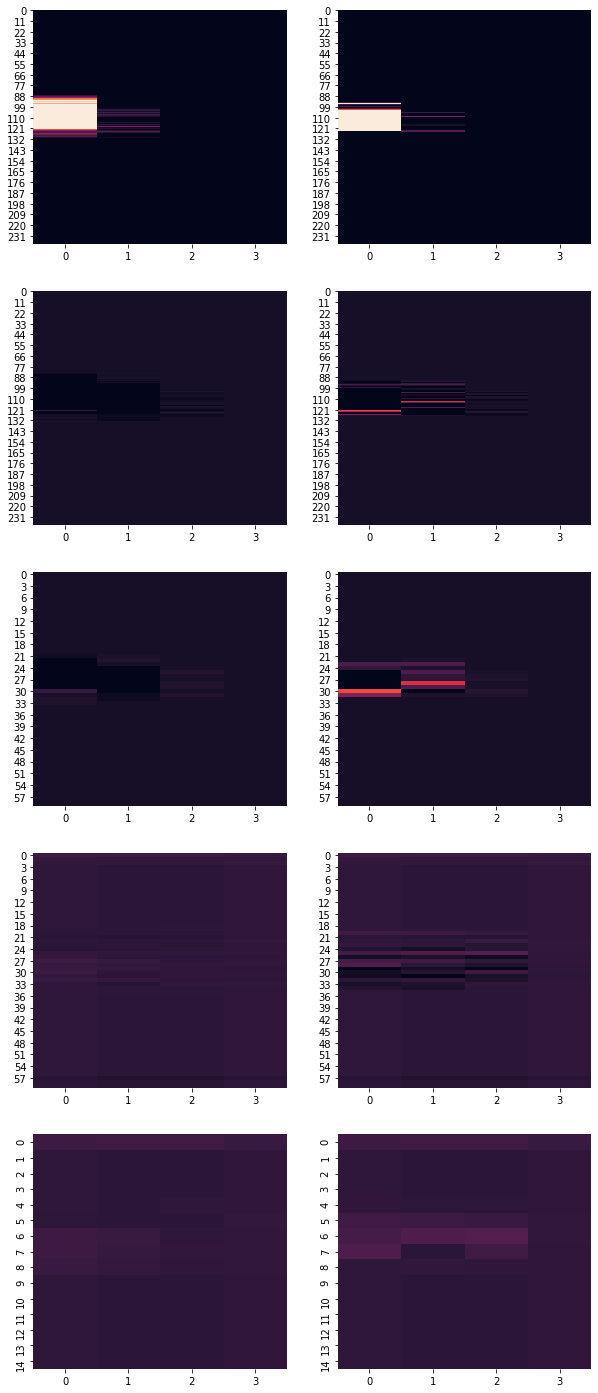

In [18]:
xm = images
im_num=500
f, ax = plt.subplots(5, 2, figsize=(10,25))
sns.heatmap(np.squeeze(tonumpy(xm))[im_num,:,:,0], cbar=False, ax=ax[0][0], vmin=0, vmax=1)
sns.heatmap(np.squeeze(tonumpy(xm))[im_num,:,:,1], cbar=False, ax=ax[0][1], vmin=0, vmax=1)

xm = relu(conv3d_1(xm))
sns.heatmap(np.squeeze(tonumpy(xm))[im_num,:,:,0], cbar=False, ax=ax[1][0], vmin=0, vmax=1)
sns.heatmap(np.squeeze(tonumpy(xm))[im_num,:,:,1], cbar=False, ax=ax[1][1], vmin=0, vmax=1)

xm, p1_ind = pool3d_1(xm)
sns.heatmap(np.squeeze(tonumpy(xm))[im_num,:,:,0], cbar=False, ax=ax[2][0], vmin=0, vmax=1)
sns.heatmap(np.squeeze(tonumpy(xm))[im_num,:,:,1], cbar=False, ax=ax[2][1], vmin=0, vmax=1)

xm = relu(conv3d_2(xm))
sns.heatmap(np.squeeze(tonumpy(xm))[im_num,:,:,0], cbar=False, ax=ax[3][0], vmin=0, vmax=1)
sns.heatmap(np.squeeze(tonumpy(xm))[im_num,:,:,1], cbar=False, ax=ax[3][1], vmin=0, vmax=1)

xm, p2_ind = pool3d_2(xm)
sns.heatmap(np.squeeze(tonumpy(xm))[im_num,:,:,0], cbar=False, ax=ax[4][0], vmin=0, vmax=1)
sns.heatmap(np.squeeze(tonumpy(xm))[im_num,:,:,1], cbar=False, ax=ax[4][1], vmin=0, vmax=1)
plt.show()

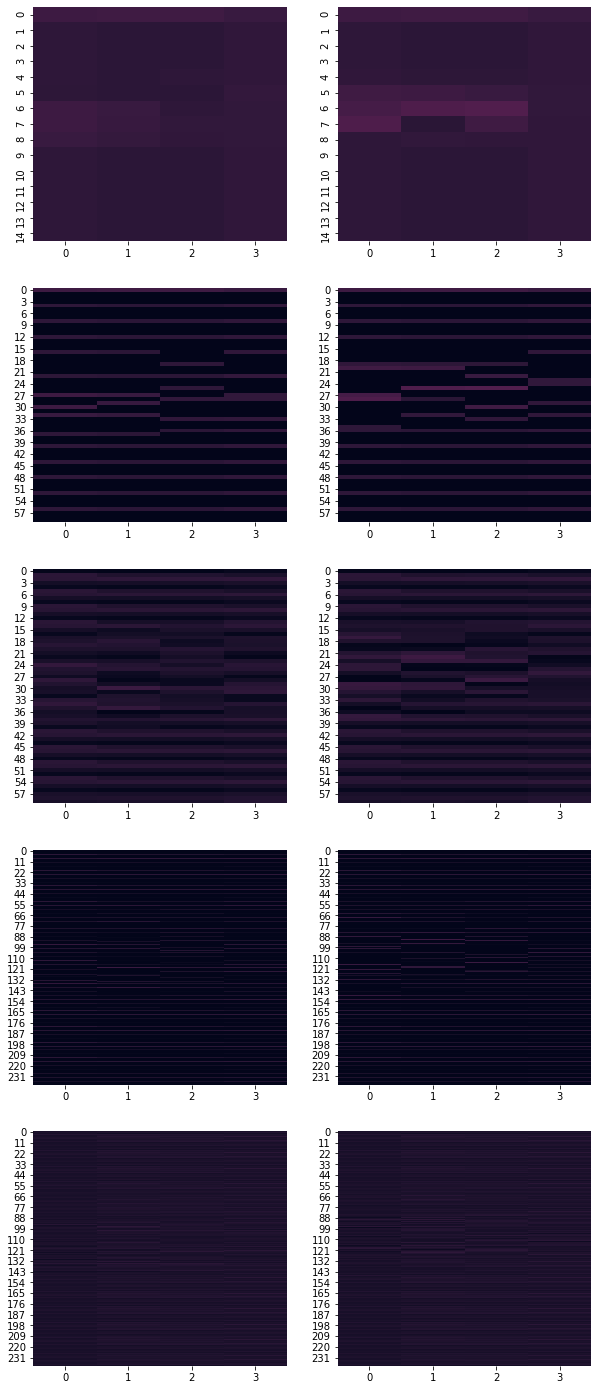

In [19]:
f, ax = plt.subplots(5, 2, figsize=(10,25))
sns.heatmap(np.squeeze(tonumpy(xm))[im_num,:,:,0], cbar=False, ax=ax[0][0], vmin=0, vmax=1)
sns.heatmap(np.squeeze(tonumpy(xm))[im_num,:,:,1], cbar=False, ax=ax[0][1], vmin=0, vmax=1)

xrm = elu(unpool3d_2(xm, p2_ind))
sns.heatmap(np.squeeze(tonumpy(xrm))[im_num,:,:,0], cbar=False, ax=ax[1][0], vmin=0, vmax=1)
sns.heatmap(np.squeeze(tonumpy(xrm))[im_num,:,:,1], cbar=False, ax=ax[1][1], vmin=0, vmax=1)

xrm = convT1_2(xrm)
sns.heatmap(np.squeeze(tonumpy(xrm))[im_num,:,:,0], cbar=False, ax=ax[2][0], vmin=0, vmax=1)
sns.heatmap(np.squeeze(tonumpy(xrm))[im_num,:,:,1], cbar=False, ax=ax[2][1], vmin=0, vmax=1)

xrm = elu(unpool3d_1(xrm, p1_ind))
sns.heatmap(np.squeeze(tonumpy(xrm))[im_num,:,:,0], cbar=False, ax=ax[3][0], vmin=0, vmax=1)
sns.heatmap(np.squeeze(tonumpy(xrm))[im_num,:,:,1], cbar=False, ax=ax[3][1], vmin=0, vmax=1)

xrm = convT1_1(xrm)
sns.heatmap(np.squeeze(tonumpy(xrm))[im_num,:,:,0], cbar=False, ax=ax[4][0], vmin=0, vmax=1)
sns.heatmap(np.squeeze(tonumpy(xrm))[im_num,:,:,1], cbar=False, ax=ax[4][1], vmin=0, vmax=1)
plt.show()